### Problem Statement ###

Analyze Acme Co.’s 2021–2025 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sheets = pd.read_excel(
    '/content/Regional Sales Dataset new.xlsx',
    sheet_name=None)

In [5]:
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_state_reg=sheets['State Regions']
df_budget=sheets['2024 Budgets']
df_regions=sheets['Regions']

In [6]:
print("df_sales :",(df_sales.shape))
print("df_customers :",(df_customers.shape))
print("df_products :",(df_products.shape))
print("df_state_reg :",(df_state_reg.shape))
print("df_budget :",(df_budget.shape))

df_sales : (64104, 12)
df_customers : (175, 2)
df_products : (30, 2)
df_state_reg : (49, 3)
df_budget : (30, 2)


In [7]:
df_state_reg.head(10)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West
6,CT,Connecticut,Northeast
7,DC,District of Columbia,South
8,DE,Delaware,South
9,FL,Florida,South


In [8]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [9]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [10]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [11]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [12]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [13]:
df_budget.isnull().sum()

,0
Product Name,0
2024 Budgets,0


### Data Cleaning and Wrangling ###


In [14]:
### Merge with customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [15]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [16]:
### merge with products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [17]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [18]:
### merge with region
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [19]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [20]:
### merge with state regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [21]:
# Merge with Budgets
df = df.merge(
    df_budget,
    how='left',
    on='Product Name'
)

In [22]:
df.to_csv('file.csv')

In [23]:
# Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')



In [24]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2024 Budgets
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [25]:
# Convert all column names to lowercase for consistency and easier access
df.columns=df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2024 budgets'], dtype=object)

In [26]:
#DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'state',
    'region',
    'latitude',
    'longitude',
    '2024 budgets'
]

df=df[cols_to_keep]


In [27]:
# Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'     : 'order_number',
    'orderdate'       : 'order_date',
    'customer names'  : 'customer_name',
    'product name'    : 'product_name',
    'order quantity'  : 'quantity',
    'unit price'      : 'unit_price',
    'line total'      : 'revenue',
    'total unit cost' : 'cost',
    'state_code'      : 'state',
    'state'           : 'state_name',
    'region'          : 'us_region',
    'latitude'        : 'lat',
    'longitude'       : 'lon',
    '2024 budgets'    : 'budget'
})


In [28]:
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2021-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [29]:
# Blank out budgets for non-2024 orders
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

df.loc[df['order_date'].dt.year != 2024, 'budget'] = pd.NA


In [30]:
#inspect
df[['order_date','product_name','revenue','budget']].head(10)


,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,NaN
1,2021-01-01,Product 20,25868.7,NaN
2,2021-01-01,Product 26,5869.2,NaN
3,2021-01-01,Product 7,16368.1,NaN
4,2021-01-01,Product 8,18331.2,NaN
5,2021-01-01,Product 23,57412.3,NaN
6,2021-01-01,Product 1,20120.1,NaN
7,2021-01-01,Product 25,10452.0,NaN
8,2021-01-01,Product 13,19262.5,NaN
9,2021-01-01,Product 14,34974.0,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64068 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [32]:
# Check for missing values in each column of the dataset
df.isnull().sum()

,0
order_number,0
order_date,36
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


In [33]:
## filter the dataset to inlcude only records from year 2024
df_2024=df[df['order_date'].dt.year == 2024]

In [34]:
df_2024

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
46363,SO - 0002544,2024-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2024-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2024-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2024-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2024-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Florida,South,28.47689,-82.52546,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2024-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,Missouri,Midwest,39.08547,-94.35210,3016489.209
61622,SO - 0004785,2024-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,Pennsylvania,Northeast,39.95234,-75.16379,2642352.432
61623,SO - 0004950,2024-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,Florida,South,29.13832,-80.99561,1672229.416
61624,SO - 0006829,2024-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,Connecticut,Northeast,41.22509,-73.06111,1672229.416


### Feature Engineering


In [35]:
# 1. Calculate total cost for each line item
df['total_cost']=df['quantity']*df['cost']

In [36]:
# 2. Calculate profit as revenue minus total_cost
df['total_profit']=df['revenue']-df['total_cost']

In [37]:
# 3. Calculate profit margin as a percentage
df['proft_margin']=(df['total_profit']/df['revenue'])*100

In [38]:
 #4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name']=df['order_date'].dt.month_name()

In [39]:
# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num']=df['order_date'].dt.month

In [40]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,total_profit,proft_margin,order_month_name,order_month_num
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1.0
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1.0
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1.0
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1.0
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2.0
64100,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2.0
64101,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2.0
64102,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2.0


### Exploratory Analysis
🔹 1. Monthly Sales Trend Over Time
Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

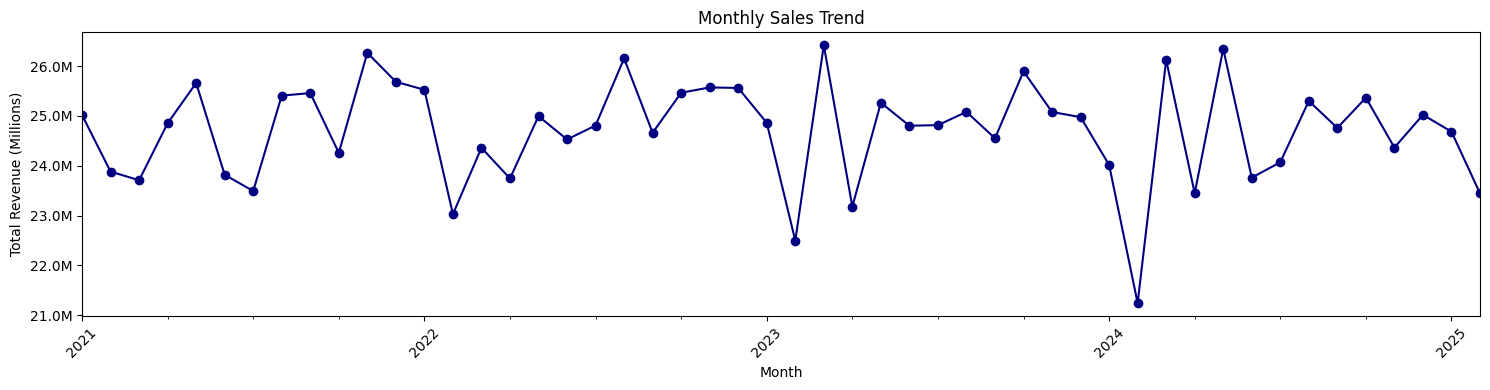

In [41]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(15, 4))
monthly_sales.plot(marker='o', color='navy')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### INSIGHTS ---


Sales consistently cycle between 24 M and
26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2024 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

### 🔹 2. Monthly Sales Trend (All Years Combined)

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

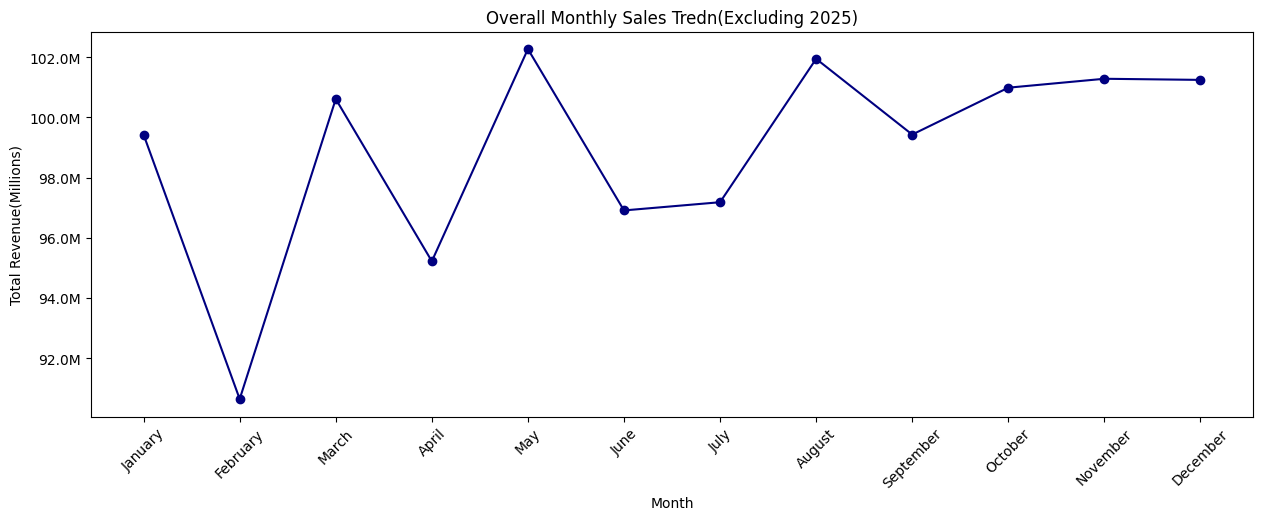

In [42]:
#filter out any dates from 2025
df_=df[df['order_date'].dt.year != 2025]


monthly_sales =(
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

#plot
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(15, 5))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o',
    color='navy'
)

formatter = FuncFormatter(lambda x ,pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Tredn(Excluding 2025)')
plt.xlabel('Month')
plt.ylabel('Total Revenue(Millions)')

plt.xticks(rotation=45)

plt.tight_layout

plt.show()

# INSIGHTS
Across all years, January begins strong with roughly **99M,folloed by a steep decline throught April slowpoint**(≈95M).Sales rebound in May and August **(≈102M) before settling into a plateau** of 99-101 M from September to December.
This patter reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

## **🔹 3. Top 10 Products by Revenue (in Millions)**
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions



/tmp/ipython-input-3295388320.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


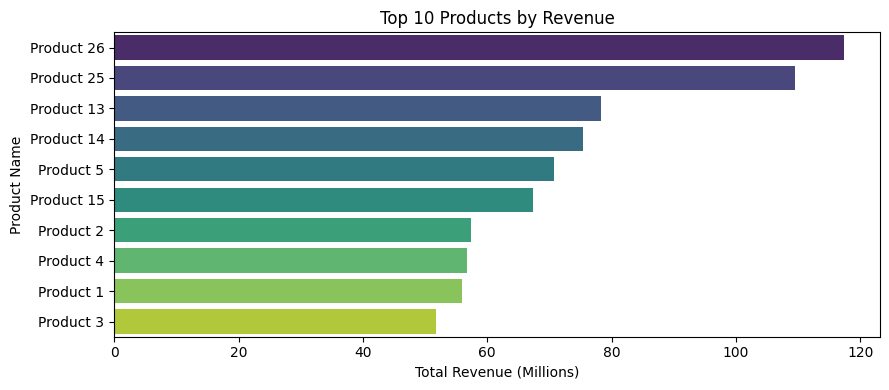

In [43]:
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

top_prod = top_prod.nlargest(10)

plt.figure(figsize=(9,4))

sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    palette='viridis'
)

plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (Millions)')
plt.ylabel('Product Name')


plt.tight_layout()

plt.show()

## INSIGHTS
Products 26 and 25 pull away at 118M
110 M, with a sharp drop to 78M for Product 13 and a tight mid pack at 68–$75 M.

The bottom four cluster at 52 -
57 M, highlighting similar constraints.

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

# 🔹 4. Top 10 Products by Avg Profit Margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

/tmp/ipython-input-1415993204.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


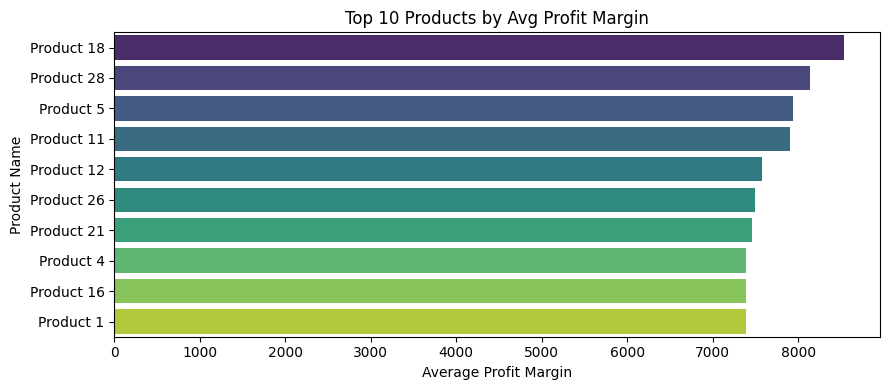

In [44]:
top_margin = (
     df.groupby('product_name')['total_profit']
     .mean()
     .sort_values(ascending=False)
     .head(10)
)

plt.figure(figsize=(9,4))

sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)

plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin')
plt.ylabel('Product Name')

plt.tight_layout()

plt.show()

# INSIGHTS--
Products 18 and 28 lead with average profit margins of approximately 8.0 - 8.3 K,followed close by Products 5 and 11 around 7.9–8.0 K.

Mid-tier performers like Products 12, 26, and 21 cluster in the 7.7 - 7.8 K range,while the bottom tier(Products 4,16 and 10) range
7.4–7.6 K.

Focusing on margin optimization strategies from top performers may help elevate overall product profitability.

# 🔹 5. Sales by Channel (Pie Chart)
Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

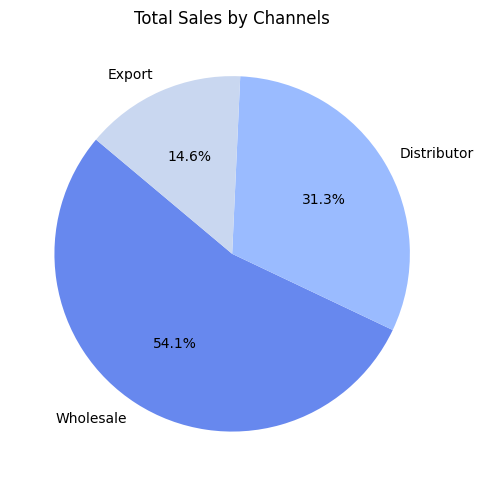

In [45]:
chan_sales=df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channels')

plt.tight_layout()

plt.show()

# INSIGHTS--
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

# 🔹 6. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

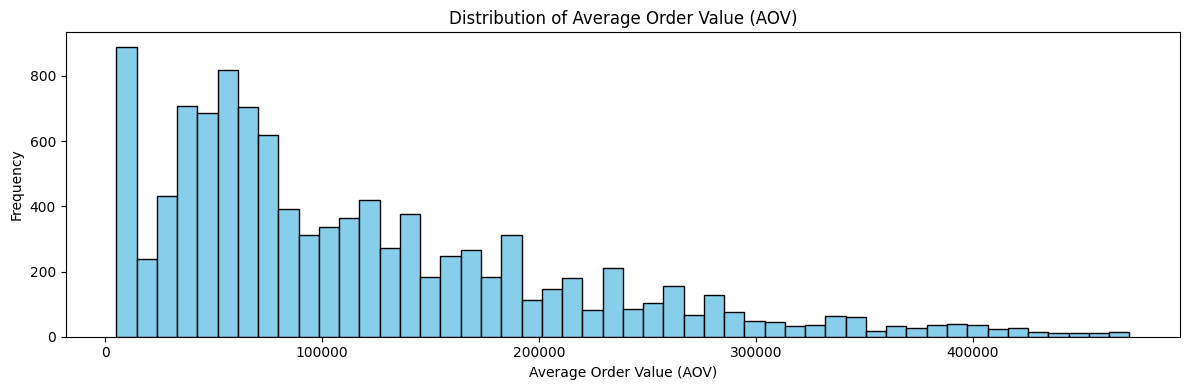

In [46]:
aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Average Order Value (AOV)')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

# INSIGHTS--
The order‐value distribution is heavily right‐skewed, with most orders clustering between 20 -
120 K and a pronounced mode around 50 -
60 K.

A long tail of high-value transactions extends up toward 400 -
500 K, but these large orders represent only a small share of total volume.

# 🔹 7. Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density


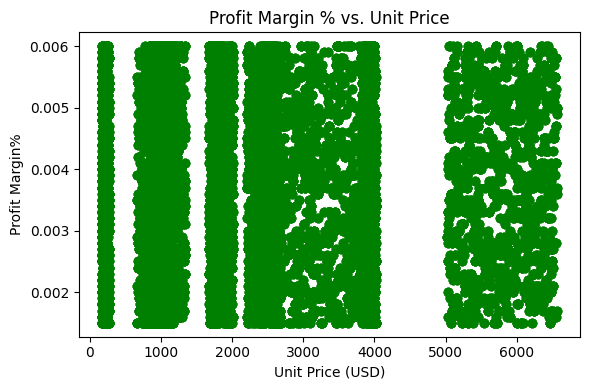

In [47]:
df['profit_margin_pct']=(df['total_profit']/df['revenue'])/100

plt.figure(figsize=(6,4))

plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='green'
)

plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin%')

plt.tight_layout()

plt.show()

# INSIGHT
Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near
0 to over 6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.

# 🔹 8. Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

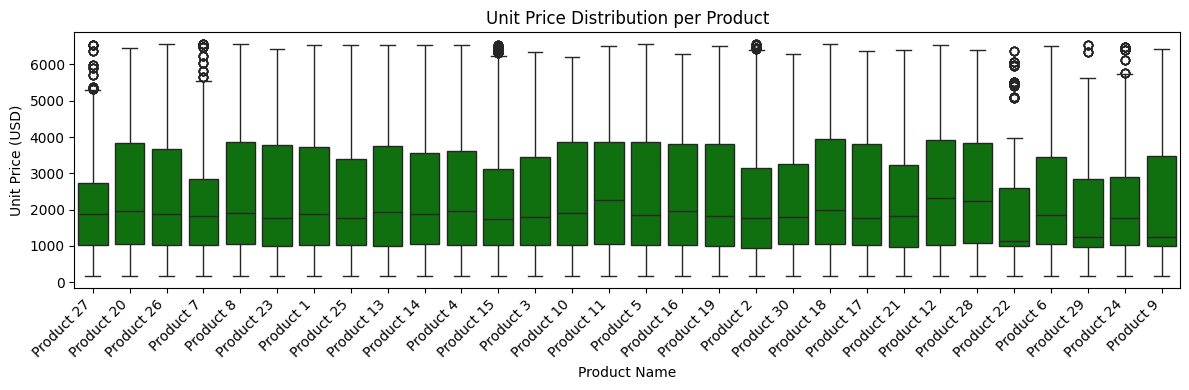

In [48]:
plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='g'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price (USD)')

plt.xticks(rotation=45,ha='right')

plt.tight_layout()

plt.show()

# INSIGHTS
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 0
100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

# 🔹 9. Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:
* Bars sorted ascending (Northeast → West) for clear
* bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions



/tmp/ipython-input-3776814114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


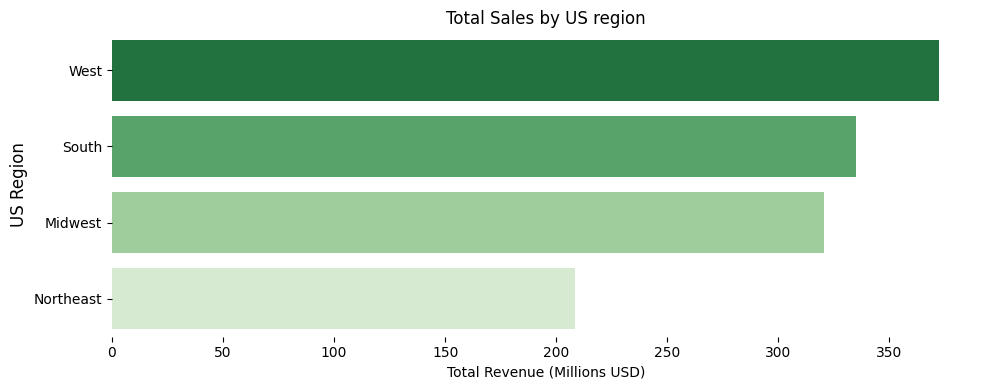

In [49]:
region_sales=(df.groupby('us_region')['revenue'].sum().sort_values(ascending=False)/1e6)

plt.figure(figsize=(10,4))

sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)

plt.title('Total Sales by US region')
plt.xlabel('Total Revenue (Millions USD)')
plt.ylabel('US Region',fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True,bottom=True)
plt.tight_layout()

plt.show()

# INSIGHTS ---


* West dominates with roughly $360 M in sales (~35 % of total), underscoring its market leadership.

*   South & Midwest each contribute over $320 M (~32 %), indicating strong, consistent demand across central regions.

* Northeast trails at about $210 M (~20 %), signaling room for growth and targeted investment.

* Action: Focus on closing the Northeast gap with local promotions and strategic partnerships, while maintaining national playbook success.




# **Saving Pre-Processed Dataframe**



In [50]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,lat,lon,budget,total_cost,total_profit,proft_margin,order_month_name,order_month_num,order_month,profit_margin_pct
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1.0,2021-01,0.0027
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1.0,2021-01,0.0046
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1.0,2021-01,0.0030
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1.0,2021-01,0.0056
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1.0,2021-01,0.0045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2.0,2025-02,0.0046
64100,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2.0,2025-02,0.0033
64101,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2.0,2025-02,0.0033
64102,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2.0,2025-02,0.0026


In [51]:
df.to_csv('Sales_data(EDA Exported).csv', index=False)


# **🔍 Key Insights**

* Monthly Revenue Cycle:
Revenue stays stable between ≈ 23 -26.5M across 2014–2017, with no consistent seasonal spikes. Sharpest drop (≈$21.2M) occurs in early 2017, indicating a possible one-time disruption

* Channel Mix:
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

* Profit Margins:
Profit margins range broadly from ≈18% to ≈60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

* Seasonal Volume:
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.
